In [5]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from GPy.examples import regression
from GPy.examples import state_space

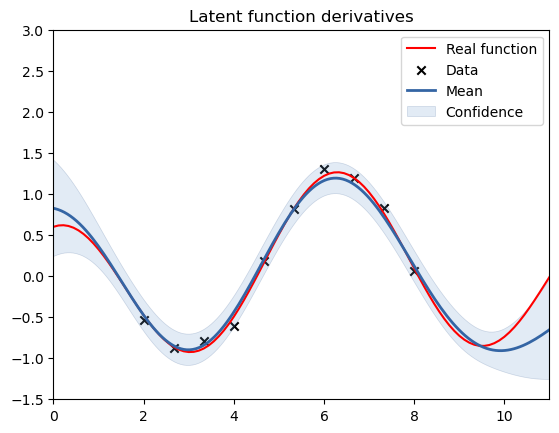

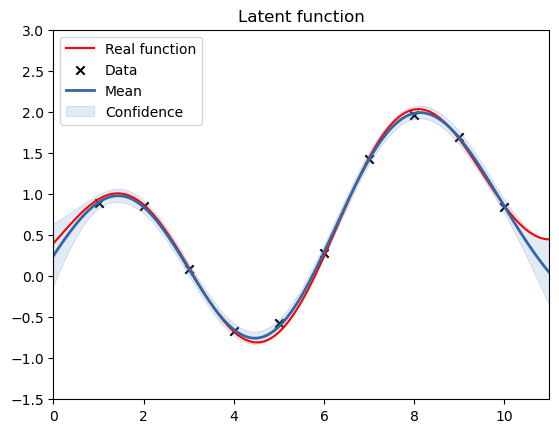

In [3]:
m = regression.multioutput_gp_with_derivative_observations()

In [4]:
ssm1, ssm2 = state_space.state_space_example()


Name : GP regression
Objective : 1891.1067094408318
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  Mat32.variance           |    1.0  |      +ve      |        
  Mat32.lengthscale        |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0000   1.891107e+03           nan 
    02s09  0010  -1.785780e+03   4.224295e+00 
    03s95  0019  -1.787856e+03   8.962779e+00 
Runtime:     03s95
Optimization status: None

KeyboardInterrupt caught, calling on_optimization_end() to round things up


 /home/alepp/miniconda3/envs/gpy/lib/python3.12/site-packages/GPy/core/gp.py:285: SyntaxWarning:invalid escape sequence '\m'
 /home/alepp/miniconda3/envs/gpy/lib/python3.12/site-packages/GPy/core/gp.py:291: SyntaxWarning:invalid escape sequence '\i'
 /home/alepp/miniconda3/envs/gpy/lib/python3.12/site-packages/GPy/core/gp.py:701: SyntaxWarning:invalid escape sequence '\m'
 /home/alepp/miniconda3/envs/gpy/lib/python3.12/site-packages/GPy/core/gp.py:717: SyntaxWarning:invalid escape sequence '\m'
 /home/alepp/miniconda3/envs/gpy/lib/python3.12/site-packages/paramz/model.py:119: SyntaxWarning:invalid escape sequence '\*'
 /home/alepp/miniconda3/envs/gpy/lib/python3.12/site-packages/paramz/core/parameter_core.py:302: SyntaxWarning:invalid escape sequence '\d'
 /home/alepp/miniconda3/envs/gpy/lib/python3.12/site-packages/GPy/kern/src/stationary.py:24: SyntaxWarning:invalid escape sequence '\e'
 /home/alepp/miniconda3/envs/gpy/lib/python3.12/site-packages/GPy/kern/src/stationary.py:152: Synt

KeyboardInterrupt: 

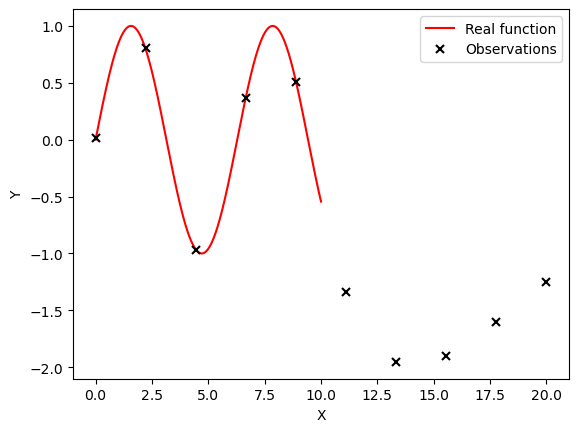

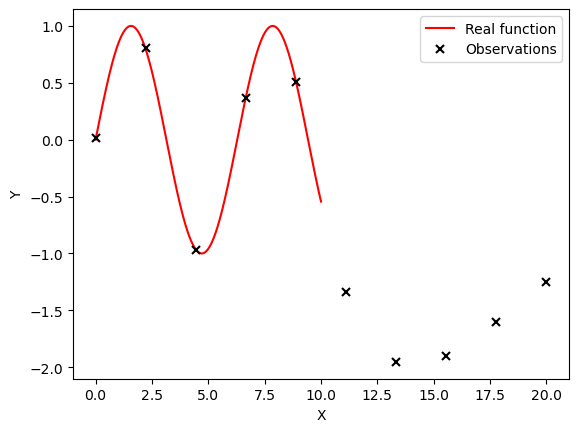

In [ ]:
X = np.linspace(0, 10, 2000)[:, None]
Y = np.sin(X)

Npred = 10;
xpred = np.array([np.linspace(0, 20, Npred)]).T

mu, var = ssm1.predict(Xnew=xpred)

#plt.plot(xpred, mu, "b", label="Predicted function")

plt.plot(X, Y, "r", label="Real function")
#plt.plot(xpred, mu, "b", label="Predicted function")
# make the second plot as points
plt.plot(xpred,mu, "kx", mew=1.5, label="Observations")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

mu, var = ssm2.predict(Xnew=xpred)

#plt.plot(xpred, mu, "b", label="Predicted function")

plt.plot(X, Y, "r", label="Real function")
#plt.plot(xpred, mu, "b", label="Predicted function")
# make the second plot as points
plt.plot(xpred,mu, "kx", mew=1.5, label="Observations")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [ ]:


GPy.kern.Coregionalize?



Init signature: GPy.kern.Coregionalize(*args, **kw)
Docstring:     
Covariance function for intrinsic/linear coregionalization models

This covariance has the form:

.. math::
   \mathbf{B} = \mathbf{W}\mathbf{W}^\intercal + \mathrm{diag}(kappa)

An intrinsic/linear coregionalization covariance function of the form:

.. math::
   k_2(x, y)=\mathbf{B} k(x, y)

it is obtained as the tensor product between a covariance function
k(x, y) and B.

:param output_dim: number of outputs to coregionalize
:type output_dim: int
:param rank: number of columns of the W matrix (this parameter is ignored if parameter W is not None)
:type rank: int
:param W: a low rank matrix that determines the correlations between the different outputs, together with kappa it forms the coregionalization matrix B
:type W: numpy array of dimensionality (num_outpus, W_columns)
:param kappa: a vector which allows the outputs to behave independently
:type kappa: numpy array of dimensionality  (output_dim, )

.. note: see c

In [7]:
f = lambda x: np.sin(x) + 0.1 * (x - 2.0) ** 2 - 0.005 * x ** 3
fd = lambda x: np.cos(x) + 0.2 * (x - 2.0) - 0.015 * x ** 2
N = 10  # Number of observations
M = 10  # Number of derivative observations
Npred = 100  # Number of prediction points
sigma = 0.05  # Noise of observations
sigma_der = 0.05  # Noise of derivative observations
x = np.array([np.linspace(1, 10, N)]).T
y = f(x) + np.array(sigma * np.random.normal(0, 1, (N, 1)))

xd = np.array([np.linspace(2, 8, M)]).T
yd = fd(xd) + np.array(sigma_der * np.random.normal(0, 1, (M, 1)))

xpred = np.array([np.linspace(0, 11, Npred)]).T
ypred_true = f(xpred)
ydpred_true = fd(xpred)

# squared exponential kernel:
se = GPy.kern.RBF(input_dim=1, lengthscale=1.5, variance=0.2)
# We need to generate separate kernel for the derivative observations and give the created kernel as an input:
se_der = GPy.kern.DiffKern(se, 0)

# Then
gauss = GPy.likelihoods.Gaussian(variance=sigma ** 2)
gauss_der = GPy.likelihoods.Gaussian(variance=sigma_der ** 2)

# Then create the model, we give everything in lists, the order of the inputs indicates the order of the outputs
# Now we have the regular observations first and derivative observations second, meaning that the kernels and
# the likelihoods must follow the same order. Crosscovariances are automatically taken care of
xConcat = [x, xd]
yConcat = [y, yd]

m = GPy.models.MultioutputGP(
    X_list=xConcat,
    Y_list=yConcat,
    kernel_list=[se, se_der],
    likelihood_list=[gauss, gauss_der],
)